<a href="https://colab.research.google.com/gist/udvzol/63f79c574a88500480846805e9681af5/lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised learning introduction, K-Nearest Neighbors (KNN)

Your task will be to predict wine quality from physicochemical features with the help of the 
[Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). You will have to do it both as a regression and classification task. 


-------

###1. Read data
  - Read the provided winequality-red.csv file. 
  - Check for missing values and that all entries are numerical. Also, check for duplicated entries (rows) and drop them.  
  - Use all columns except the last as features and the quality column as target. 
  - Make 80-20% train test split (use sklearn).
  - Prepare a one-hot encoded version of the y_test and y_train values ie. make a six long vector of the 6 quality classes (3-8), with only one non-zero value, e.g. 3->[1,0,0,0,0,0], 4->[0,1,0,0,0,0], 5->[0,0,1,0,0,0] etc. (You can use pandas or sklearn for that.) *You will have to use the one-hot encoded labels in the classification exercise only.*
  - Normalize the features by substracting the means and dividing by the standard deviation feature by feature. If you want to be very precise, you should use only the mean and std in the training set for normalization, because generally the test test is not available at training time.

----

###2. KNN regression
- Implement naive K nearest neighbour regression as a function only using python and numpy. The signature of the function should be:
```python
def knn_regression(x_test, x_train, y_train, k=20):
        """Return prediction with knn regression."""
        .
        .
        .
        return y_pred
```
- Use Euclidean distance as a measure of distance.
- Make prediction with k=20 for the test set using the training data.
- Plot the true and the predicted values from the test set on a scatterplot.

-----

### 3. Weighted KNN regression
- Modify the knn_regression function by adding a weight to each neighbor that is inversely proportional to the distance.
```python
def knn_weighted_regression(x_test,x_train,y_train,k=20):
    """Return prediction with weighted knn regression."""
    ...
    return y_pred
```
- Make prediction with k=20 for the test set using the training data.
- Plot the true and the predicted values from the test set on a scatterplot.

-----

### 4. KNN classification
- Implement the K-nearest neighbors classification algorithm using only pure Python3 and numpy! Use L2 distance to find the neighbors. The prediction for each class should be the number of neighbors supporting the given class divided by k (for example if k is 5 and we have 3 neighbors for class A, 2 for class B and 0 for class C neighbors, then the prediction for class A should be 3/5, for class B 2/5, for class C 0/5). Use the one-hot encoded labels!
```python
def knn_classifier(X_train, y_train, X_test, k=20):
  """Return prediction with knn classification."""
    ...
    return y_pred
```

- Make prediction with k=20 for the test set using the training data.

-----

### 5. Compare the models
- Make a baseline model: this can be the mean value of the training labels for every sample.
- Compare the regression and classification models to the baseline: You can do this by rounding the continous predictions of the regression to the nearest integer. Calculate the accuracy (fraction of correctly classified samples) of the models.
- Check your KNN implementations by running the sklearn built-in model. 
You can run it for any model you implented. The predictions should be the same as yours. Some help:
  ```python
  from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
  knn= KNeighborsRegressor(20, weights="distance")
  #knn= KNeighborsClassifier(20, weights="uniform")
  knn.fit(X_train, y_train)
  knn.predict(X_test)
  ```
- Write down your observations.
----
### Hints:
- On total you can get 10 points for fully completing all tasks.
- Decorate your notebook with questions, explanation etc, make it self contained and understandable!
- Comment your code when necessary!
- Write functions for repetitive tasks!
- Use the pandas package for data loading and handling
- Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
- Use the scikit learn package for almost everything
- Use for loops only if it is really necessary!
- Code sharing is not allowed between students! Sharing code will result in zero points.
- If you use code found on web, it is OK, but, make its source clear!

## Solution
### 1.

In [1]:
import pandas as pd
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv("winequality-red.csv", sep=";")
data.drop_duplicates(inplace=True)

In [4]:
print(data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [5]:
data.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[:-1]].values, data[data.columns[-1]], test_size=0.2, random_state=42)
X_test=(X_test-X_train.mean(0))/X_train.std(0)
X_train=(X_train-X_train.mean(0))/X_train.std(0)

In [7]:
#one-hot encoded y
y_test_ohe = pd.get_dummies(y_test).values
y_train_ohe = pd.get_dummies(y_train).values

### 2. KNN regression

In [8]:
# The distance to use in the KNN, the euclidean distance
def distances(x1,x2):
    d2=(x1-x2)**2
    return np.sqrt(np.sum(d2, axis=1))

def knn_regression(x_test,x_train,y_train, k=10):
    
    y_pred=[]
    #for every instance in the test sample get the predicted value
    for x2 in x_test:
        #calculate the distance from all points in the training set
        d_t=distances(x2,x_train)
        #Give back the index of the k smallest elements in the distance list, that is what the argpartition function does
        #See weighted KNN for argsort version, it makes a full sort - slower
        k_ind=np.argpartition(d_t,k)
        #Average the y value of the k nearest neighbours and use that as the predicted value 
        y=np.mean(y_train[k_ind][:k])
        y_pred.append(y)
    y_pred=np.array(y_pred)
    return y_pred

In [9]:
y_pred0 = knn_regression(X_test, X_train, y_train.values, 20)

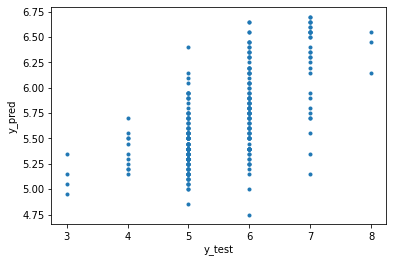

In [10]:
plt.plot(y_test, y_pred0, ".")
xlabel("y_test")
ylabel("y_pred");

### 3. Weighted KNN regression

In [11]:
def knn_weighted_regression(x_test,x_train,y_train,k=10):
    y_pred=[]
    #for every instance in the test sample get the predicted value
    for x2 in x_test:
        #calculate the distance from all points in the training set
        d_t=distances(x2,x_train)
        #You can use argpartition here also, but let's make it with argsort
        k_ind=np.argsort(d_t)[:k]
        #Average the y values with the weights with the np.average function and use that as the predicted value 
        y=np.average(y_train[k_ind],weights=1/d_t[k_ind])
        y_pred.append(y)
    y_pred=np.array(y_pred)
    return y_pred

In [12]:
y_pred1 = knn_weighted_regression(X_test, X_train, y_train.values, 20)

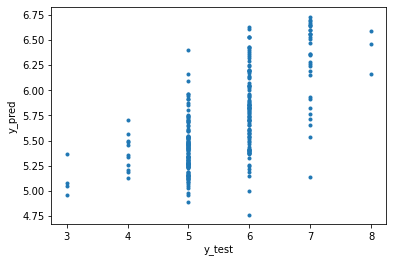

In [13]:
plt.plot(y_test, y_pred1, ".")
xlabel("y_test")
ylabel("y_pred");

### 4. KNN classification

In [14]:
def knn_classifier(X_train, y_train, X_test, k=20):
    predictions = []
    for i in X_test:
        neighbor_idxs = np.argsort(((np.array(X_train) - np.array(i))**2).sum(1))[:k]        
        predictions.append(np.array(y_train)[neighbor_idxs].mean(0))
        
    return np.array(predictions)

In [15]:
y_pred2 = knn_classifier(X_train, y_train_ohe, X_test)

### 5. Compare

In [16]:
print("Accuracy of KNN regression: ", sum(around(y_pred0)==y_test)/len(y_test))
print("Accuracy of weighted KNN regression: ", sum(around(y_pred1)==y_test)/len(y_test))
print("Accuracy of KNN classification: ", sum(np.argmax(y_pred2, axis=1)==np.argmax(y_test_ohe, axis=1))/len(y_test))
print("Baseline: ", sum(around([y_train.mean()]*len(y_test))==y_test)/len(y_test))

Accuracy of KNN regression:  0.6029411764705882
Accuracy of weighted KNN regression:  0.6286764705882353
Accuracy of KNN classification:  0.6066176470588235
Baseline:  0.3786764705882353


In [17]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
knn= KNeighborsRegressor(20, weights="uniform")
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
print("Accuracy of built-in KNN regression: ", sum(around(y_pred3)==y_test)/len(y_test))

knn= KNeighborsRegressor(20, weights="distance")
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
print("Accuracy of built-in weighted KNN regression: ", sum(around(y_pred3)==y_test)/len(y_test))

knn= KNeighborsClassifier(20, weights="uniform")
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
print("Accuracy of built-in KNN classifier: ", sum(around(y_pred3)==y_test)/len(y_test))

Accuracy of built-in KNN regression:  0.6029411764705882
Accuracy of built-in weighted KNN regression:  0.6286764705882353
Accuracy of built-in KNN classifier:  0.6066176470588235
